<a href="https://colab.research.google.com/github/predisha/Content-Monetization-Modeler-/blob/main/Amazon_Music_Clusteting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving single_genre_artists.csv to single_genre_artists.csv


In [2]:
import pandas as pd

df = pd.read_csv("single_genre_artists.csv")
print("✅ Dataset Loaded Successfully!")
df.head()


✅ Dataset Loaded Successfully!


,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [3]:
# ===============================================
# 📦 STEP 1: Import Required Libraries
# ===============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# ===============================================
# 📂 STEP 2: Load Dataset
# ===============================================
df = pd.read_csv("single_genre_artists.csv")
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset Loaded Successfully!
Shape: (95837, 23)


,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,-13.757,1,0.0512,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,-15.375,1,0.0670,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,-15.514,1,0.0592,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,-12.393,0,0.1650,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,-13.806,1,0.1380,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [4]:

# 🔍 STEP 3: Data Exploration & Cleaning
# ===============================================
print("\nMissing values per column:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Drop columns that are not needed for clustering
drop_cols = ["id_songs", "name_song", "id_artists", "name_artists",
             "release_date", "explicit", "key", "mode",
             "time_signature", "genres"]
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')

# Remove duplicate rows
df = df.drop_duplicates()
print("\n✅ Cleaned Data Shape:", df.shape)



Missing values per column:
 id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64

Duplicate rows: 0

✅ Cleaned Data Shape: (95565, 13)


In [5]:
# ===============================================
#  STEP 4: Feature Selection
# ===============================================
features = ["danceability", "energy", "loudness", "speechiness",
            "acousticness", "instrumentalness", "liveness",
            "valence", "tempo", "duration_ms"]

# Check which features exist in dataset
available = [f for f in features if f in df.columns]
print("Using features:", available)

df_features = df[available].dropna()
print("Feature DataFrame shape:", df_features.shape)


Using features: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Feature DataFrame shape: (95565, 10)


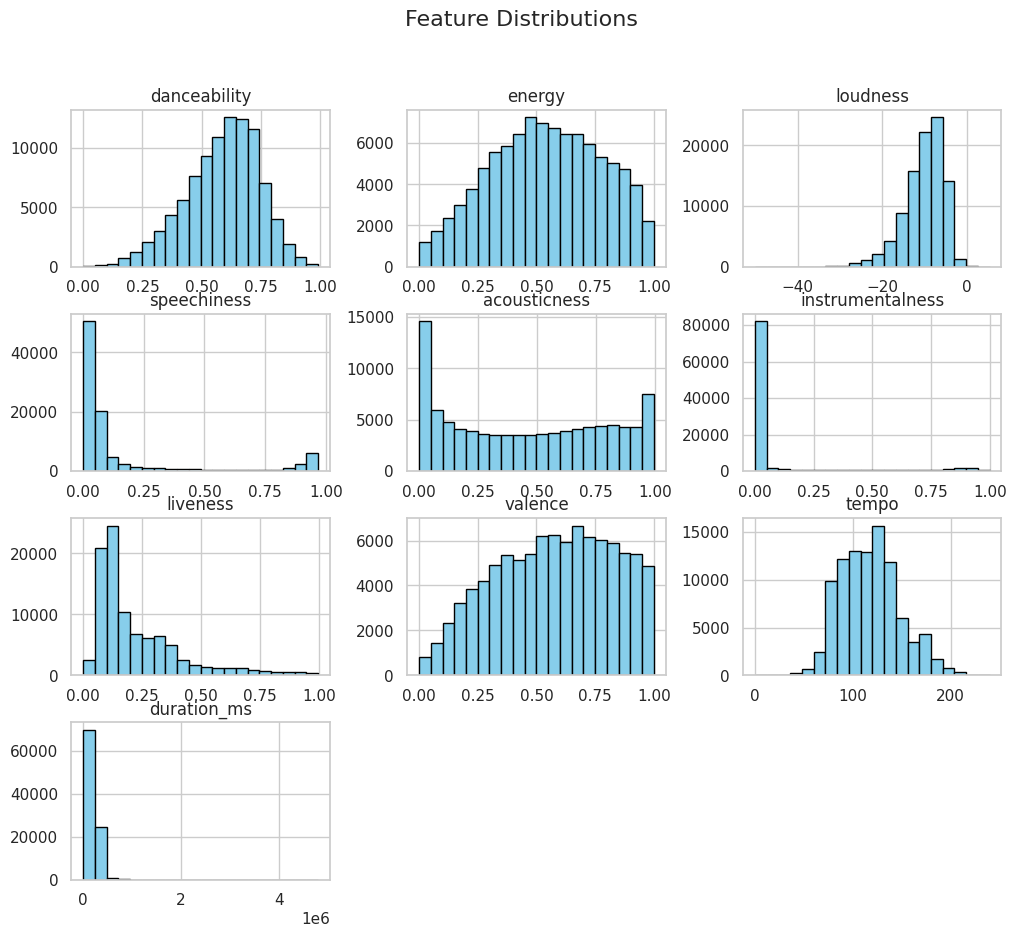

In [6]:
# ===============================================
# STEP 5: Visualize Feature Distributions
# ===============================================
df_features.hist(figsize=(12,10), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


In [7]:
# ===============================================
# ⚖️ STEP 6: Normalize / Scale Features
# ===============================================
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)
print("✅ Data normalized successfully! Shape:", scaled_data.shape)


✅ Data normalized successfully! Shape: (95565, 10)


Running for k=2 ...
Running for k=3 ...
Running for k=4 ...
Running for k=5 ...
Running for k=6 ...


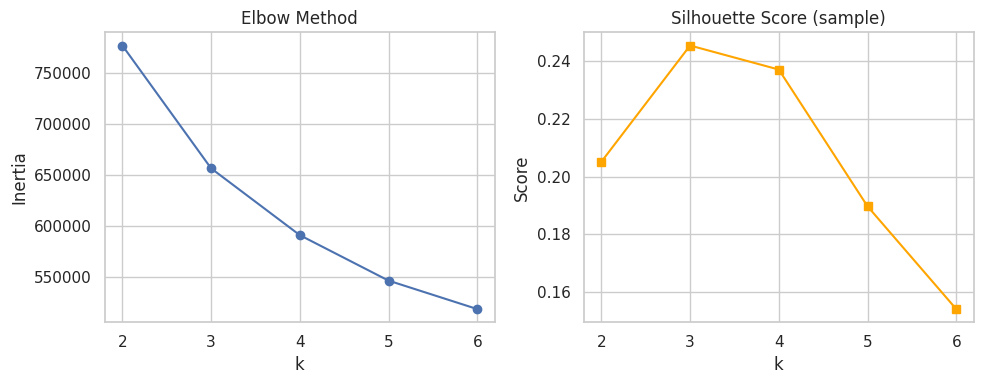


Inertia: {2: 776597.4862347922, 3: 656552.6011332783, 4: 591247.7569215309, 5: 546807.585967039, 6: 518998.4744597948}
Silhouette Scores: {2: np.float64(0.20513710836095064), 3: np.float64(0.24539978540442647), 4: np.float64(0.2370673609450083), 5: np.float64(0.18970409509761632), 6: np.float64(0.15411509504834459)}


In [8]:
# ===============================================
#  STEP 7: Determine Optimal Number of Clusters
# (Fast Elbow & Silhouette)
# ===============================================
inertia = []
silhouette_scores = []
K = [2, 3, 4, 5, 6]

for k in K:
    print(f"Running for k={k} ...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5, max_iter=200)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

    # Silhouette on sample for speed
    sample_size = min(5000, len(scaled_data))
    idx = np.random.choice(len(scaled_data), sample_size, replace=False)
    labels_sample = kmeans.labels_[idx]
    sil = silhouette_score(scaled_data[idx], labels_sample)
    silhouette_scores.append(sil)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, marker='s', color="orange")
plt.title("Silhouette Score (sample)")
plt.xlabel("k")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

print("\nInertia:", dict(zip(K, inertia)))
print("Silhouette Scores:", dict(zip(K, silhouette_scores)))


In [9]:
# ===============================================
# STEP 8: Apply K-Means with chosen k
# (Change k_chosen if needed)
# ===============================================
k_chosen = 4   # <-- you can change this after checking elbow/silhouette plots
kmeans = KMeans(n_clusters=k_chosen, random_state=42, n_init=10, max_iter=300)
df_result = df.loc[df_features.index].copy()
df_result["Cluster"] = kmeans.fit_predict(scaled_data)

print("✅ Clustering done successfully!")
print("\nCluster counts:\n", df_result["Cluster"].value_counts())


✅ Clustering done successfully!

Cluster counts:
 Cluster
2    46249
1    29189
0    12390
3     7737
Name: count, dtype: int64


In [10]:
# ===============================================
# STEP 9: Evaluate Clusters
# ===============================================
sample_idx = np.random.choice(len(scaled_data), min(5000, len(scaled_data)), replace=False)
sil = silhouette_score(scaled_data[sample_idx], df_result["Cluster"].iloc[sample_idx])
db = davies_bouldin_score(scaled_data, df_result["Cluster"])

print(f"\nSilhouette Score (sample): {sil:.4f}")
print(f"Davies-Bouldin Index: {db:.4f}")



Silhouette Score (sample): 0.2311
Davies-Bouldin Index: 1.5282


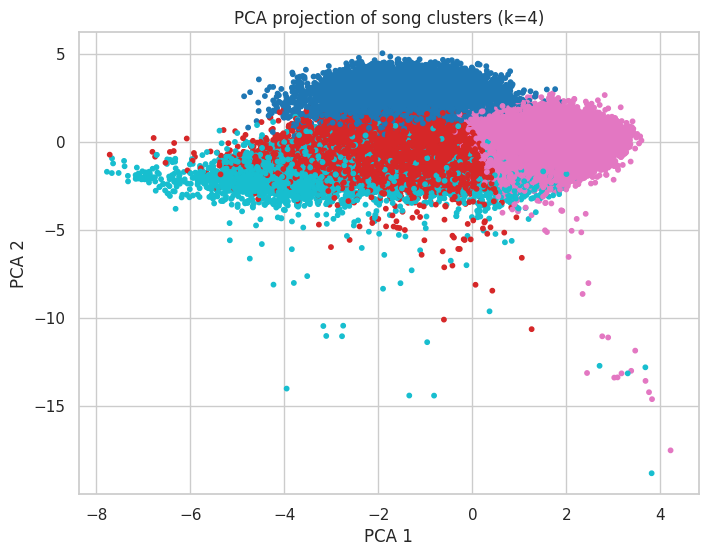


Cluster Means:
          danceability  energy  loudness  speechiness  acousticness  \
Cluster                                                              
0               0.664   0.467   -13.387        0.835         0.586   
1               0.505   0.342   -12.113        0.061         0.698   
2               0.635   0.708    -7.411        0.077         0.242   
3               0.486   0.417   -14.011        0.060         0.645   

         instrumentalness  liveness  valence    tempo  duration_ms  
Cluster                                                             
0                   0.001     0.435    0.583  100.310    96874.641  
1                   0.017     0.183    0.427  113.496   225000.350  
2                   0.021     0.201    0.686  125.270   224666.494  
3                   0.811     0.188    0.451  114.403   229888.488  


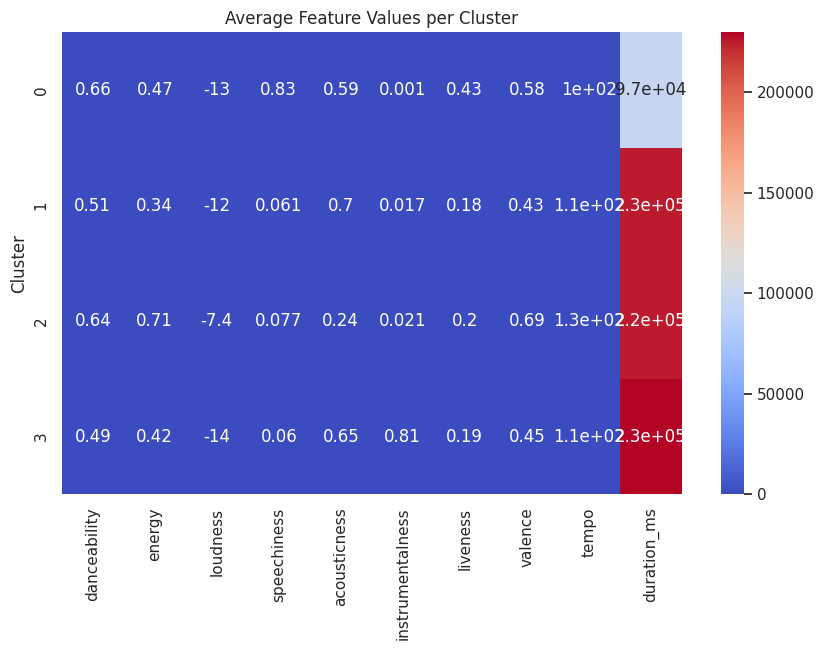

In [11]:
# ===============================================
#  STEP 10: Visualize Clusters (PCA + Heatmap)
# ===============================================
pca = PCA(n_components=2, random_state=42)
pca_coords = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_coords[:,0], pca_coords[:,1], c=df_result["Cluster"], cmap="tab10", s=10)
plt.title(f"PCA projection of song clusters (k={k_chosen})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

cluster_means = df_result.groupby("Cluster")[available].mean().round(3)
print("\nCluster Means:\n", cluster_means)

plt.figure(figsize=(10,6))
sns.heatmap(cluster_means, annot=True, cmap="coolwarm")
plt.title("Average Feature Values per Cluster")
plt.show()


In [12]:
# ===============================================
#  STEP 11: Export Final Dataset
# ===============================================
df_result.to_csv("amazon_music_clusters.csv", index=False)
print("✅ Exported 'amazon_music_clusters.csv' successfully!")

# Optional: describe clusters
for c, row in cluster_means.iterrows():
    desc = []
    if row["danceability"] >= cluster_means["danceability"].median(): desc.append("danceable")
    if row["energy"] >= cluster_means["energy"].median(): desc.append("energetic")
    if row["acousticness"] >= cluster_means["acousticness"].median(): desc.append("acoustic")
    if row["instrumentalness"] >= cluster_means["instrumentalness"].median(): desc.append("instrumental")
    print(f"Cluster {c}: {', '.join(desc) if desc else 'mixed characteristics'}")



✅ Exported 'amazon_music_clusters.csv' successfully!
Cluster 0: danceable, energetic
Cluster 1: acoustic
Cluster 2: danceable, energetic, instrumental
Cluster 3: acoustic, instrumental
